# Predição de morte por insuficiência cardíaca

**Autores:**

- Gabriel Bertazzoli
  <a href="https://www.linkedin.com/in/gabriel-bertazzoli/" target="_blank">
    <img src="https://raw.githubusercontent.com/maurodesouza/profile-readme-generator/master/src/assets/icons/social/linkedin/default.svg" width="20" height="20" />
  </a>

- Pedro Marques
  <a href="https://www.linkedin.com/in/pedro-ribaldo-marques" target="_blank">
    <img src="https://raw.githubusercontent.com/maurodesouza/profile-readme-generator/master/src/assets/icons/social/linkedin/default.svg" width="20" height="20" />
  </a>

<img width="60" height="30" src="https://www.kaggle.com/static/images/site-logo.svg">

O dataset usado neste notebook foi pego através do link a seguir: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data <br/>

## 0 Importando o dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="white")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.spines.right': False,
         'axes.spines.top': False}
plt.rcParams.update(params)

In [ ]:
dados = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

## 1 Sobre o problema

Doenças cardiovasculares são a maior causa de morte em todo o mundo, cerca de 17,9 milhões anualmente. Em média, representam cerca de 30% de todas as mortes registradas globalmente nesse mesmo período. <br/>

Dentre as doenças cardiovasculares, a insuficiência cardíaca é uma das mais comuns, e ocupa um lugar significativo no ranking de mortalidade entre as doenças ligadas ao sistema cardiovascular. <br/>

Este dataset contém 12 fatores que podem ser usados para predizer mortalidade por insuficiência cardíaca. <br/>

## 2 Pegando os dados

In [ ]:
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Convertendo os nomes das colunas para português

A primeira coisa que foi feita foi traduzir o dataset, pois, como ele estava em inglês, traduzí-lo facilitará muito o trabalho.

In [ ]:
mapa = {
    "age" : "idade",
    "anaemia" : "anemia",
    "creatinine_phosphokinase" : "creatina_fosfoquinase",
    "ejection_fraction" : "fracao_de_ejecao",
    "high_blood_pressure" : "pressao_alta",
    "platelets" : "plaquetas",
    "serum_creatinine" : "creatinina",
    "serum_sodium" : "sodio",
    "sex" : "sexo",
    "smoking" : "fumante",
    "time" : "tempo",
    "DEATH_EVENT" : "morte"
}
dados = dados.rename(columns = mapa)
dados.head()

,idade,anemia,creatina_fosfoquinase,diabetes,fracao_de_ejecao,pressao_alta,plaquetas,creatinina,sodio,sexo,fumante,tempo,morte
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


idade: idade do paciente em anos.

anemia: nível de hemoglobinas no sangue abaixo do normal. tem (1) ou não tem (0)

diabetes: falta de insulina, caracterizando altas taxas de açúcar no sangue. tem (1) ou não tem (0)

fracao_de_ejecao: percentual de sangue que o ventrículo ejeta na aorta a cada batimento. (%)

pressao_alta: se o paciente possui (1) ou não (0) pressão alta.

plaquetas: estruturas responsáveis pela cicatrização de feridas e reparação de vasos sanguíneos (un/µL).

creatinina: substância que tem como objetivo fornecer energia para o músculo (mg/dL)

sodio: regula o volume sanguíneo e tem papel importante nos impulsos nervosos (mEq/L)

sexo: homem (1) ou mulher (0)

fumante: sim (1) ou não (0)

tempo: número de dias pelos quais o paciente foi acompanhado.

morte: sim (1) ou não (0).

## 3 Explorando os dados

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   idade                  299 non-null    float64
 1   anemia                 299 non-null    int64  
 2   creatina_fosfoquinase  299 non-null    int64  
 3   diabetes               299 non-null    int64  
 4   fracao_de_ejecao       299 non-null    int64  
 5   pressao_alta           299 non-null    int64  
 6   plaquetas              299 non-null    float64
 7   creatinina             299 non-null    float64
 8   sodio                  299 non-null    int64  
 9   sexo                   299 non-null    int64  
 10  fumante                299 non-null    int64  
 11  tempo                  299 non-null    int64  
 12  morte                  299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Aqui já podemos notar algo bem interessante. Isto é, a coluna sexo representa sexo masculino e feminino com valores de 1 e 0. Isso indica que precisaremos, futuramente, separar essa coluna em outras 2, e sua razão será explicada mais para frente.

In [ ]:
dados.describe()

,idade,anemia,creatina_fosfoquinase,diabetes,fracao_de_ejecao,pressao_alta,plaquetas,creatinina,sodio,sexo,fumante,tempo,morte
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Aqui vemos quantidade de dados nulos em cada uma das colunas listadas

In [ ]:
dados.isnull().sum()

idade                    0
anemia                   0
creatina_fosfoquinase    0
diabetes                 0
fracao_de_ejecao         0
pressao_alta             0
plaquetas                0
creatinina               0
sodio                    0
sexo                     0
fumante                  0
tempo                    0
morte                    0
dtype: int64

Vemos se existe alguma coluna duplicada, contendo valores iguais

In [ ]:
dados.duplicated().any()

False

### Visualizando os dados

Em ambos os gráficos (boxplot e violinplot), percebemos que existem outliers que devem ser tratados da melhor forma possível

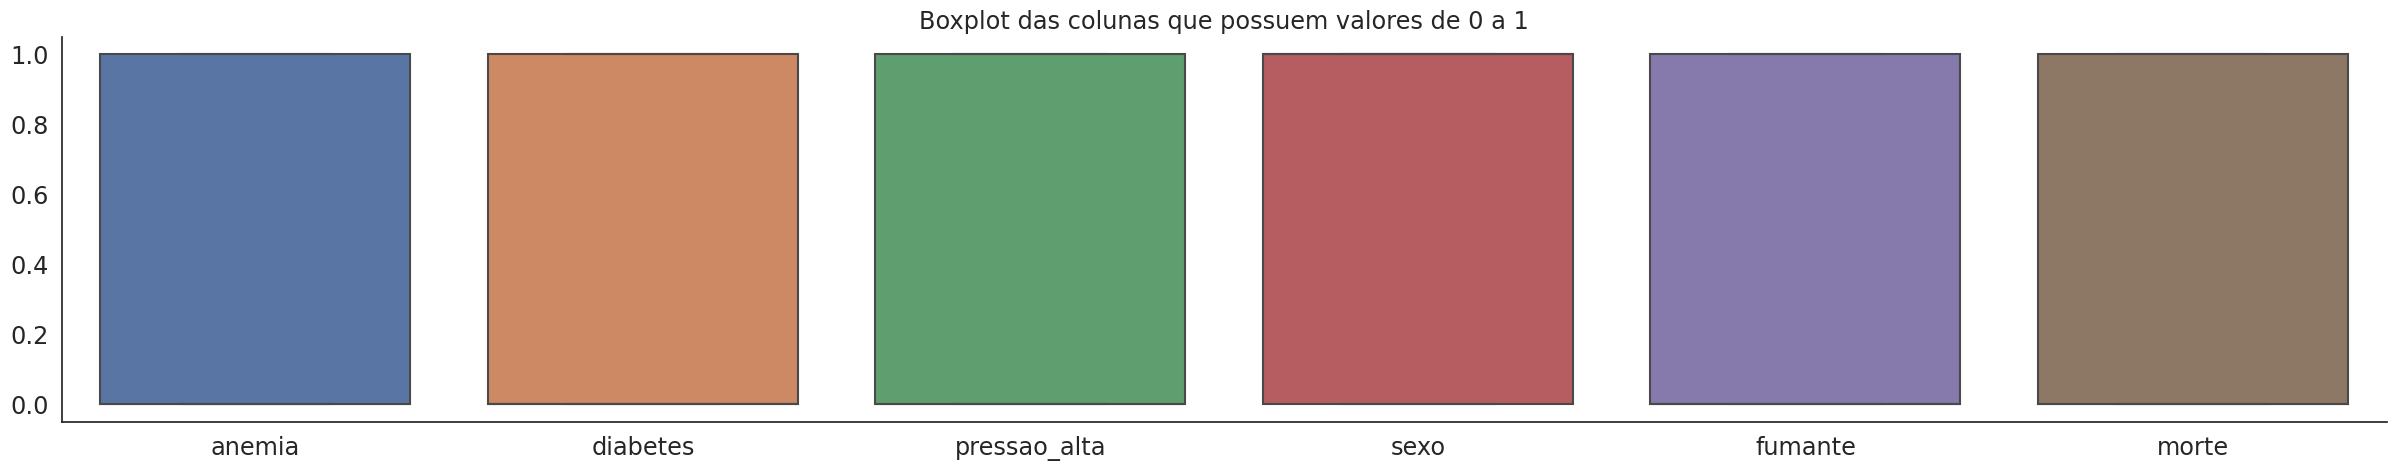

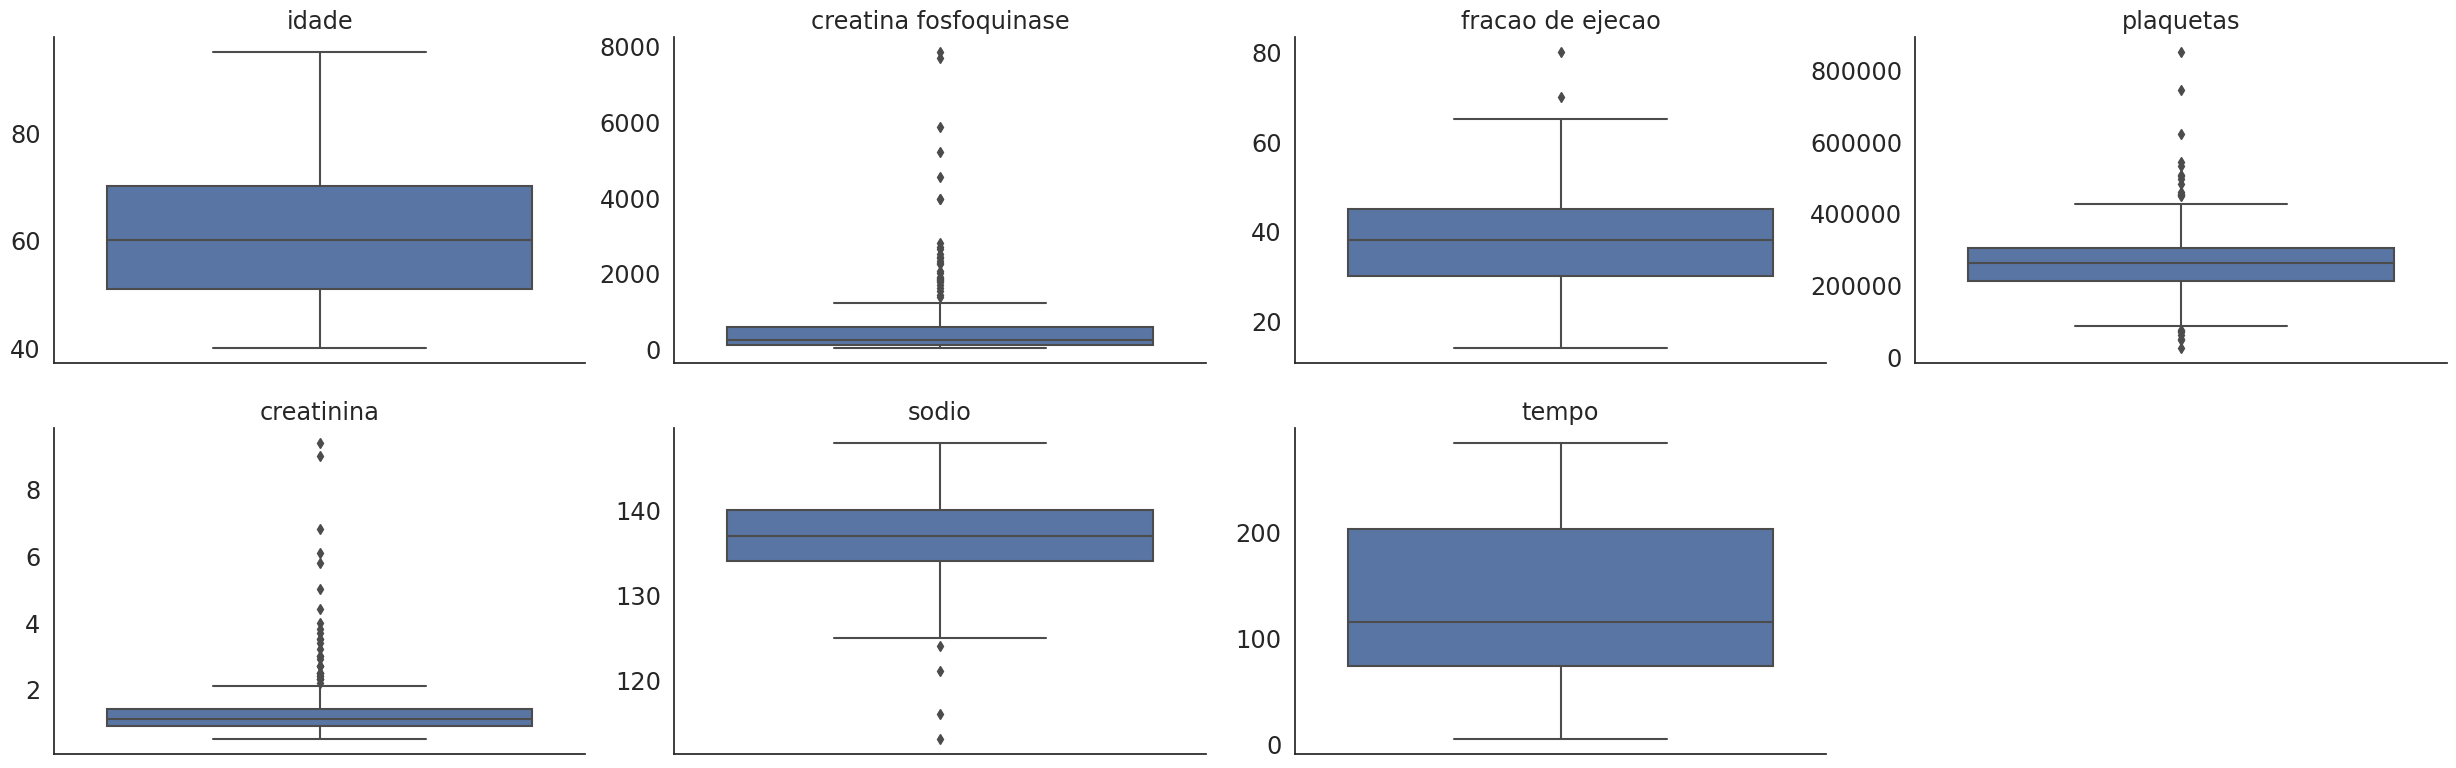

In [ ]:
plt.subplots(figsize=(30,5))

boxplot = sns.boxplot(data=dados.loc[:, ["anemia", "diabetes", "pressao_alta", "sexo", "fumante", "morte"]])
boxplot.set_title('Boxplot das colunas que possuem valores de 0 a 1')
plt.show()

fig, axes = plt.subplots(2, 4, figsize=(25,8))
plt.tight_layout()
fig.delaxes(axes[1,3])

num_variables = ["idade", "creatina_fosfoquinase", "fracao_de_ejecao", "plaquetas", "creatinina", "sodio", "tempo"]

for i, var in enumerate(num_variables):
  row = i//4
  col = i%4
  boxplot = sns.boxplot(data=dados, y = var, ax=axes[row, col])
  axes[row,col].set(ylabel = None)
  boxplot.set_title(var.replace('_', ' '))

 A seguir, é mostrado o gráfico de violino, o qual nos mostra para onde os dados se concentram. Este tipo de gráfico é muito importante ao se pensar nas colunas que possuem somente valores de 0 e 1, pois isto determina para onde os valores tendem. <br/>

 Neste caso, somente os valores de sexo tendem a 1, enquanto todas as outras colunas tendem a 0.

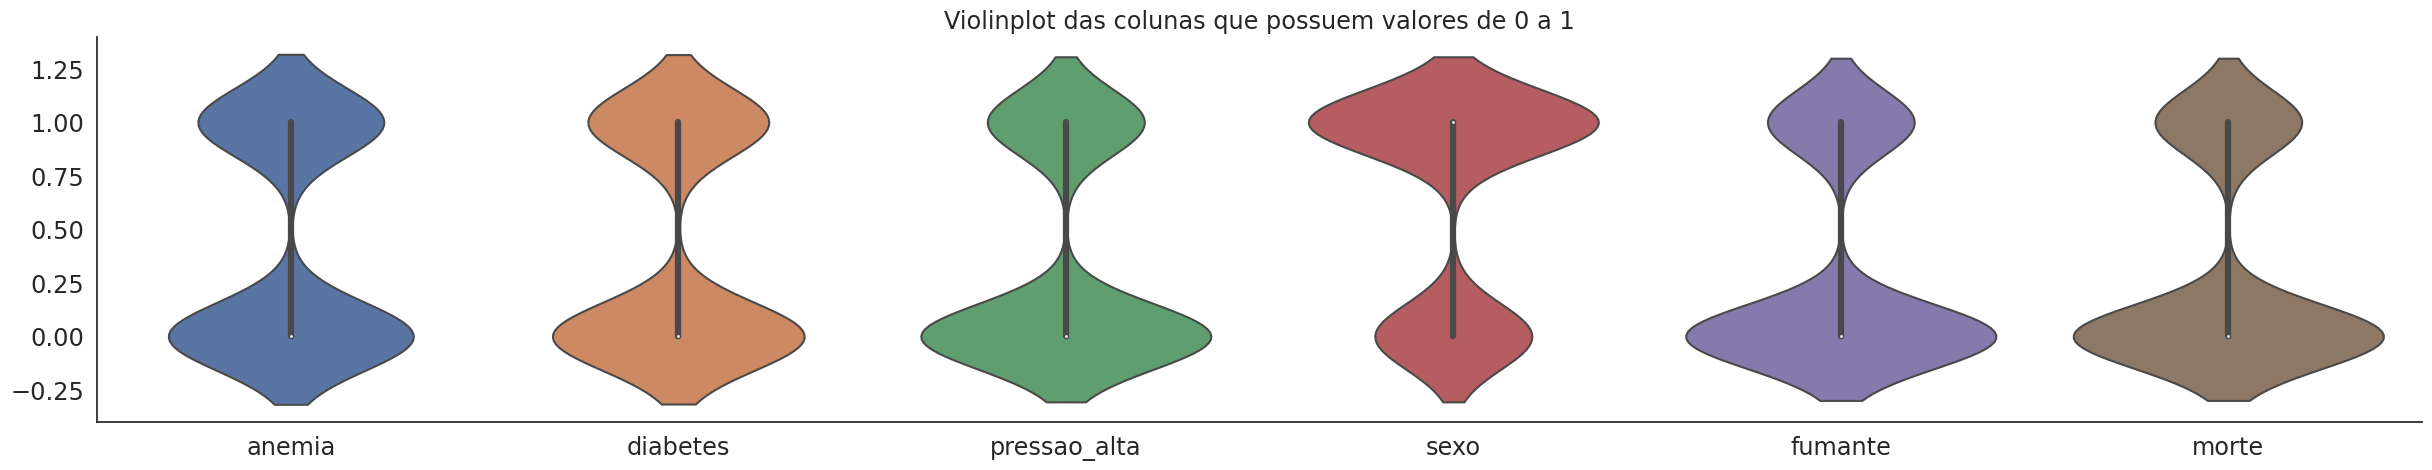

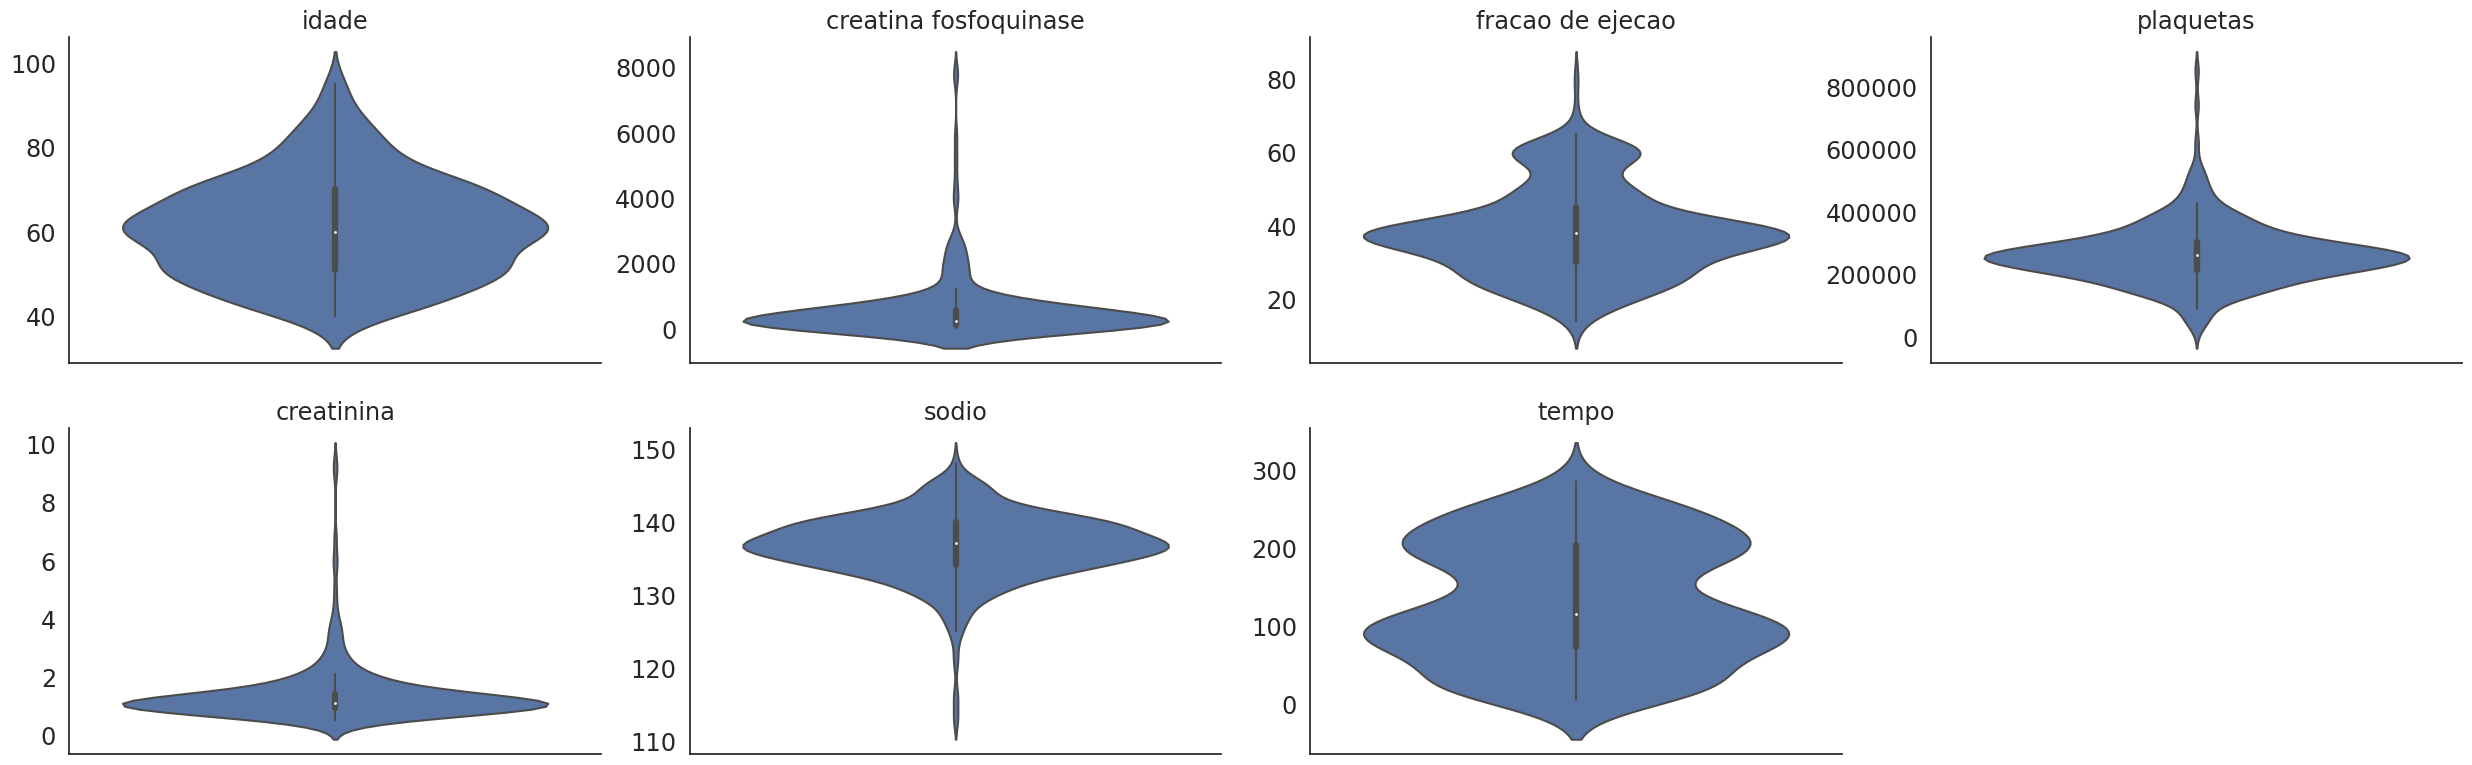

In [ ]:
plt.subplots(figsize=(30,5))

violinplot = sns.violinplot(data=dados.loc[:, ["anemia", "diabetes", "pressao_alta", "sexo", "fumante", "morte"]])
violinplot.set_title('Violinplot das colunas que possuem valores de 0 a 1')
plt.show()

fig, axes = plt.subplots(2, 4, figsize=(25,8))
plt.tight_layout()
fig.delaxes(axes[1,3])

num_variables = ["idade", "creatina_fosfoquinase", "fracao_de_ejecao", "plaquetas", "creatinina", "sodio", "tempo"]

for i, var in enumerate(num_variables):
  row = i//4
  col = i%4
  violinplot = sns.violinplot(data=dados, y = var, ax=axes[row, col])
  axes[row,col].set(ylabel = None)
  violinplot.set_title(var.replace('_', ' '))

Aqui vemos se algum atributo em específico tem correlação com outros dados das colunas. O principal a se pensar quando olhar para o seguinte heatmap é em quais variáveis independentes exercem mais influência na variável dependente (morte). Ainda sim é válido perceber correlações entre as próprias variáveis independentes

<ipython-input-11-8aa59bb2a09d>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(dados.corr(), dtype=np.bool))  # cria uma matriz traingular de correlação


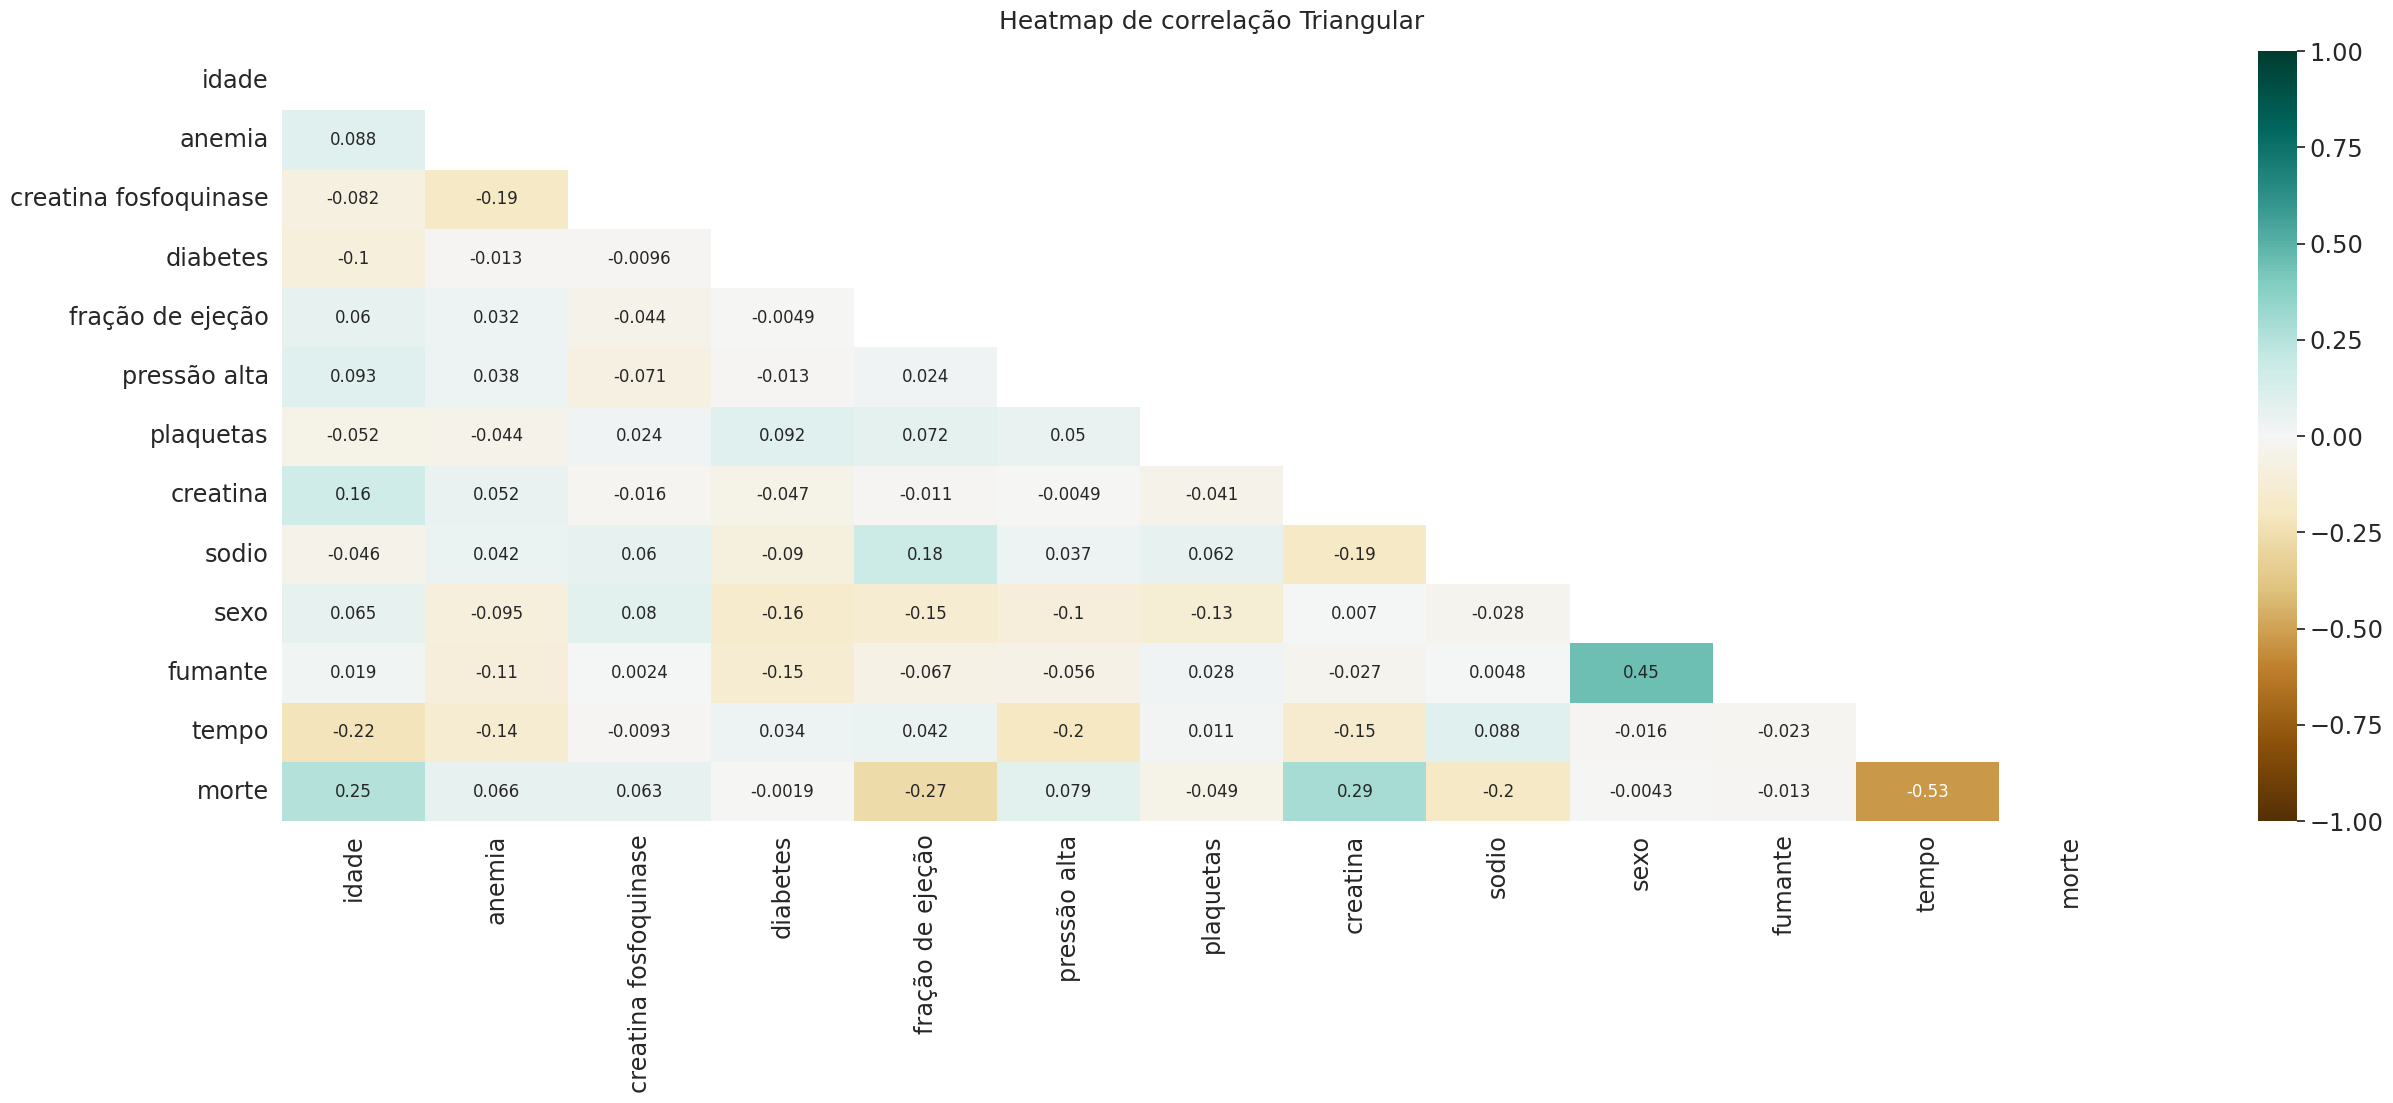

In [ ]:
# plotando a correlação em forma de heatmap
plt.figure(figsize=(30, 10))

x_axis_labels = ['idade', 'anemia', 'creatina fosfoquinase', 'diabetes', 'fração de ejeção', 'pressão alta', 'plaquetas', 'creatina', 'sodio', 'sexo', 'fumante', 'tempo', 'morte'] # labels para eixo x
y_axis_labels = ['idade', 'anemia', 'creatina fosfoquinase', 'diabetes', 'fração de ejeção', 'pressão alta', 'plaquetas', 'creatina', 'sodio', 'sexo', 'fumante', 'tempo', 'morte'] # labels para eixo y

mask = np.triu(np.ones_like(dados.corr(), dtype=np.bool))  # cria uma matriz traingular de correlação

heatmap = sns.heatmap(dados.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
heatmap.set_title('Heatmap de correlação Triangular', fontdict={'fontsize':18}, pad=16);

## 4 Limpando os dados

### Separando os dados em x_dados (variáveis independentes) e y_dados (variáveis dependentes)

Como queremos identificar qual o valor de morte (sendo 0 a representação de alguém que não morreu e 1 a representação de alguém que morreu) usando os dados fornecidos, precisamos separar as variáveis independentes (não dependem de alguma coluna em específico para variar) das variáveis dependentes (dependem de uma ou mais colunas para que variem). <br/>

Observação: Normalmente as variáveis dependentes são as variáveis que queremos predizer

A x_dados foram associadas as colunas de variáveis independentes

In [ ]:
x_dados = dados[["idade", "anemia", "creatina_fosfoquinase", "diabetes", "fracao_de_ejecao", "pressao_alta", "plaquetas", "creatinina", "sodio", "sexo", "fumante", "tempo"]]
x_dados.head()

,idade,anemia,creatina_fosfoquinase,diabetes,fracao_de_ejecao,pressao_alta,plaquetas,creatinina,sodio,sexo,fumante,tempo
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


A y_dados foi associada a coluna de variáveis dependentes

In [ ]:
y_dados = dados[["morte"]]
y_dados.head()

,morte
0,1
1,1
2,1
3,1
4,1


### Limpando as colunas desnecessárias

Primeiramente, precisamos entender que, a partir da análise do dataframe fornecido e do significado de cada coluna, os dados da coluna tempo não poderão ser usados por nós. <br/>

É importante entender que o tempo está diretamente relacionado à morte do paciente. Ou seja, caso o paciente tenha morrido, seu tempo marcará a quantidade de dias até seu falecimento, marcando o tempo que este teve acompanhamento após o diagnóstico de que tem algum tipo de problema cardíaco, e, caso o paciente tenha sobrevivido, seu tempo marcará a quantidade de dias que este teve acompanhamento após o diagnóstico de que tem algum tipo de problema cardíaco.

In [ ]:
x_dados = x_dados.drop('tempo', axis=1)
x_dados.head()

,idade,anemia,creatina_fosfoquinase,diabetes,fracao_de_ejecao,pressao_alta,plaquetas,creatinina,sodio,sexo,fumante
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0


### Limpando os Outliers

In [ ]:
x_dados.describe()

,idade,anemia,creatina_fosfoquinase,diabetes,fracao_de_ejecao,pressao_alta,plaquetas,creatinina,sodio,sexo,fumante
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000


Aqui selecionamos as colunas de dados que queremos retirar os outliers, substituindo estas pela mediana dos dados de cada uma cas colunas

No nosso caso, as colunas selecionadas foram: creatina_fosfoquinase, fracao_de_ejecao, plaquetas, creatinina e sodio

In [ ]:
columns_to_remove_outliers = ['creatina_fosfoquinase', 'fracao_de_ejecao', 'plaquetas', 'creatinina', 'sodio']

É selecionado os quartis de cada uma das colunas e substituido os valores que estão abaixo do primeiro quartil e acima do terceiro quartil pela mediana de cada uma das colunas selecionadas. Assim, são removidos os outliers das colunas selecionadas.

Observação: o lower bound selecionado foi dado como não negativo, podendo ter somente dados acima de 0. Assim, qualquer valor de lower bound que seja negativo, será alterado para o valor 0. <br/>

**A razão? Simples, nenhuma dessa colunas pode ter seus valores negativos**

In [ ]:
x_dados_no_outliers = x_dados.copy()

for var in columns_to_remove_outliers:
  Q1 = x_dados[var].quantile(0.25)
  Q3 = x_dados[var].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  if lower_bound < 0:
    lower_bound = 0
  upper_bound = Q3 + 1.5 * IQR

  outliers = (x_dados_no_outliers[var] < lower_bound) | (x_dados_no_outliers[var] > upper_bound)
  x_dados_no_outliers[var] = np.where(outliers, x_dados_no_outliers[var].mean(), x_dados_no_outliers[var])

  print(f'**** {var} ****')
  print(f'Min: {x_dados[var].min()}')
  print(f'Mediana: {x_dados[var].median()}')
  print(f'Max: {x_dados[var].max()}')
  print(f'Intervalos: [{lower_bound:.2f}, {upper_bound:.2f}]\n')

**** creatina_fosfoquinase ****
Min: 23
Mediana: 250.0
Max: 7861
Intervalos: [0.00, 1280.25]

**** fracao_de_ejecao ****
Min: 14
Mediana: 38.0
Max: 80
Intervalos: [7.50, 67.50]

**** plaquetas ****
Min: 25100.0
Mediana: 262000.0
Max: 850000.0
Intervalos: [76000.00, 440000.00]

**** creatinina ****
Min: 0.5
Mediana: 1.1
Max: 9.4
Intervalos: [0.15, 2.15]

**** sodio ****
Min: 113
Mediana: 137.0
Max: 148
Intervalos: [125.00, 149.00]



In [ ]:
x_dados = x_dados_no_outliers

Aqui vemos como os outliers foram quase totalmente limpos, deixando mais concentrados os dados

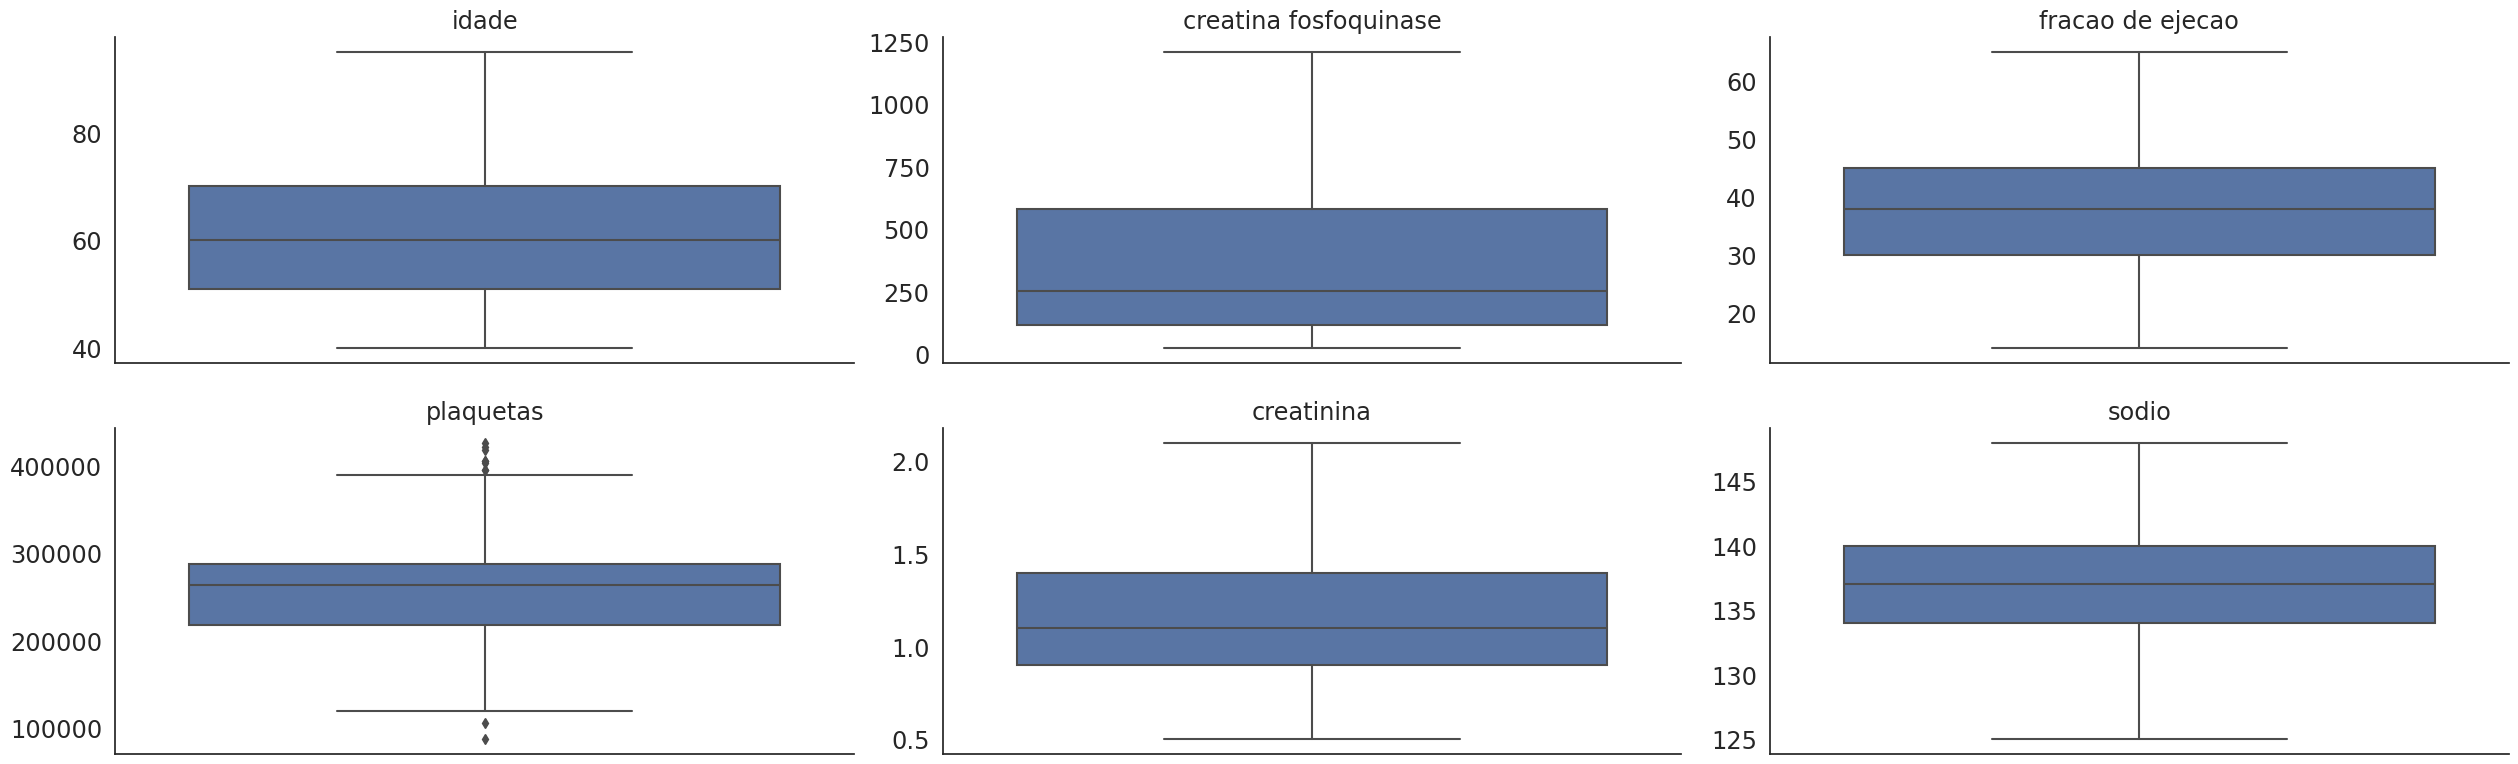

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(25,8))
plt.tight_layout()

num_variables = ["idade", "creatina_fosfoquinase", "fracao_de_ejecao", "plaquetas", "creatinina", "sodio"]

for i, var in enumerate(num_variables):
  row = i//3
  col = i%3
  boxplot = sns.boxplot(data=x_dados, y = var, ax=axes[row, col])
  axes[row,col].set(ylabel = None)
  boxplot.set_title(var.replace('_', ' '))

## 5 Pré-processamento

Aqui na parte de preprocessamento vamos usar algo chamado One-hot-encoding para tratar a coluna 'sexo'. Dessa forma, essa coluna sairá para dar espaço às colunas de 'homem' e 'mulher', e para cada linha, uma será 0 e a outra será 1, de acordo com o sexo do paciente.

In [ ]:
x_dados['sexo'].value_counts()

1    194
0    105
Name: sexo, dtype: int64

In [ ]:
x_dados = pd.get_dummies(data=x_dados, columns=['sexo'])

mapa2 = {
    'sexo_0' : 'mulher',
    'sexo_1' : 'homem'
}
x_dados = x_dados.rename(columns = mapa2)
x_dados.head()

,idade,anemia,creatina_fosfoquinase,diabetes,fracao_de_ejecao,pressao_alta,plaquetas,creatinina,sodio,fumante,mulher,homem
0,75.0,0,582.000000,0,20.0,1,265000.00,1.90000,130.000000,0,0,1
1,55.0,0,581.839465,0,38.0,0,263358.03,1.10000,136.000000,0,0,1
2,65.0,0,146.000000,0,20.0,0,162000.00,1.30000,129.000000,1,0,1
3,50.0,1,111.000000,0,20.0,0,210000.00,1.90000,137.000000,0,0,1
4,65.0,1,160.000000,1,20.0,0,327000.00,1.39388,136.625418,0,1,0


Acima, vimos como as colunas finais ficaram após a utilização do One-hot-encoding.

## 6 Treinando o algoritmo

Para treinar o modelo, utilizaremos três métodos muito conhecidos de classificação, o KNN (K-Nearest Neighbors), a Regressão Logística, e Decision Tree Classifier.

### KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

treino_x, teste_x, treino_y, teste_y = train_test_split(x_dados, y_dados, random_state = 42, test_size = 0.15, stratify = y_dados)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 254 elementos e testaremos com 45 elementos


Como se pode perceber pelo código abaixo, usaremos o KNN com o 25 vizinho mais próximos, que foi o número de vizinhos que apresentou a maior acurácia.


Acurácia com 25 vizinhos: 68.89
precisao nan
sensibilidade 0.0
especificidade 1.0
f_score nan



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-23-ff819e6819c9>:13: RuntimeWarning: invalid value encountered in long_scalars
  precisao = VP/(VP+FP)


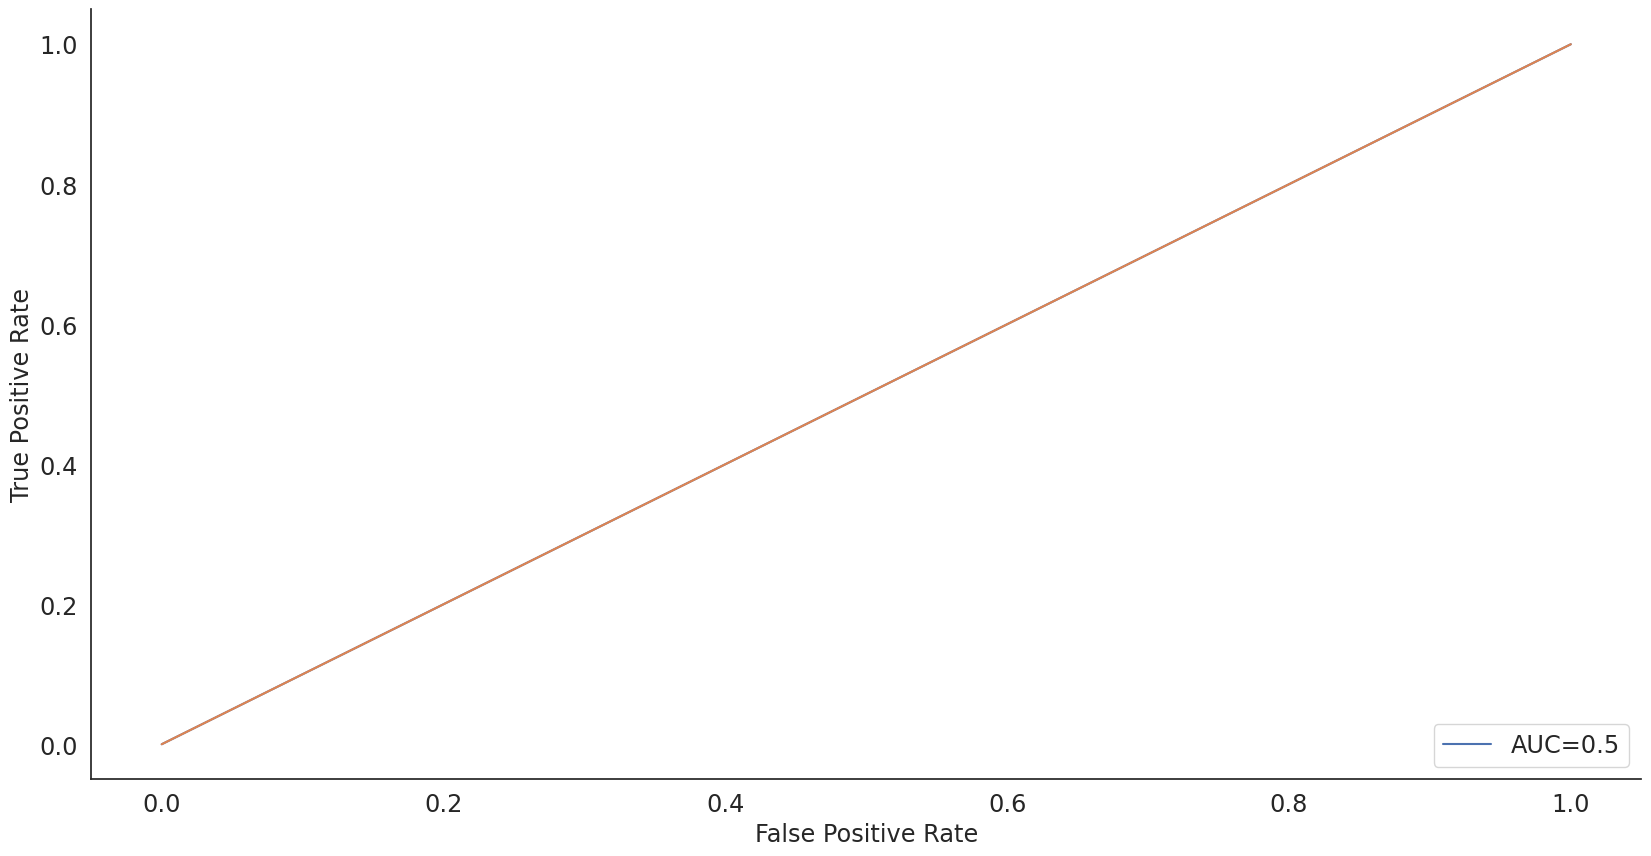

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(treino_x, treino_y)

y_pred = knn.predict(teste_x)
matriz_confusao = confusion_matrix(teste_y, y_pred)
VP = matriz_confusao[1][1]
FP = matriz_confusao[0][1]
VN = matriz_confusao[0][0]
FN = matriz_confusao[1][0]

sensibilidade = VP/(VP+FN)
especificidade = VN/(FP+VN)
precisao = VP/(VP+FP)
f_score = 2*(precisao*sensibilidade)/(precisao+sensibilidade)

print()
print(f"Acurácia com 25 vizinhos: {accuracy_score(teste_y, y_pred)*100:.2f}")
print("precisao", precisao)
print("sensibilidade", sensibilidade)
print("especificidade", especificidade)
print("f_score", f_score)
print()

fpr, tpr, _ = metrics.roc_curve(teste_y,  y_pred)
auc = metrics.roc_auc_score(teste_y, y_pred)

#ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

O método KNN não é o melhor método para resolver este problema. Através da análise da quantidade de VP, FP, VN e FN, é possível perceber que o modelo nunca prevê positivo, ele sempre prevê valores negativos. Com isso, o cálculo das métricas se torna impossível, pois acaba envolvendo divisões por zero e outros cálculos impossiveis.

### Regressão Logística

A regressão logística apresentou exatamente a mesma acurácia, mostrando-se um método com a mesma validade do KNN.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Acurácia: 68.89
precisao 0.5
sensibilidade 0.2857142857142857
especificidade 0.8709677419354839
f_score 0.36363636363636365



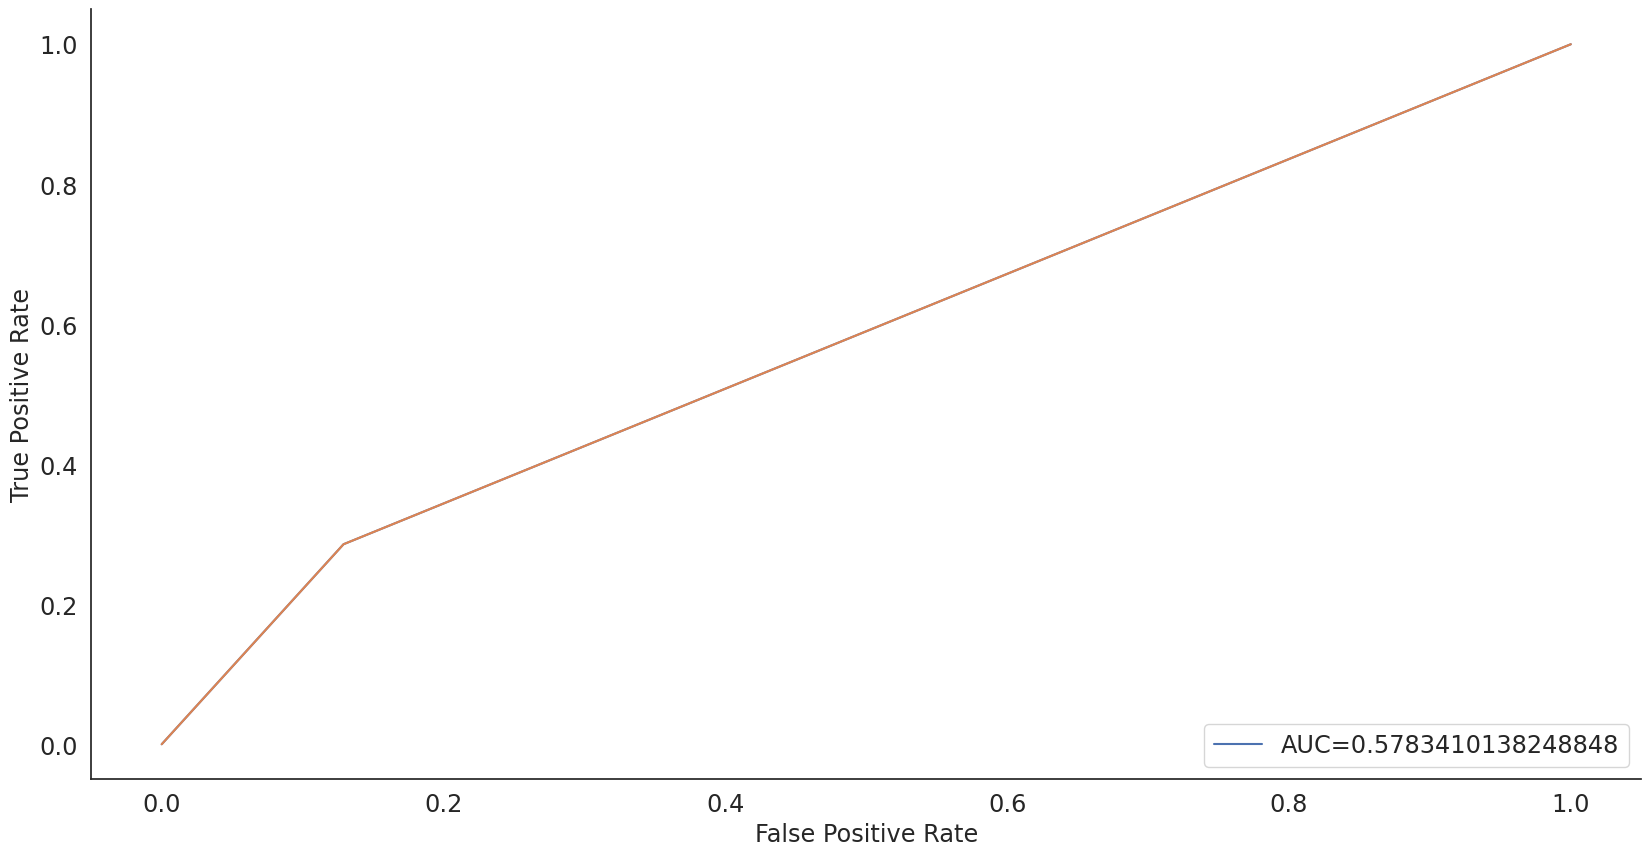

In [ ]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()
reg_log.fit(treino_x, treino_y)
y_pred_reg_log = reg_log.predict(teste_x)
matriz_confusao1 = confusion_matrix(teste_y, y_pred_reg_log)

VP1 = matriz_confusao1[1][1]
FP1 = matriz_confusao1[0][1]
VN1 = matriz_confusao1[0][0]
FN1 = matriz_confusao1[1][0]


sensibilidade1 = VP1/(VP1+FN1)
especificidade1 = VN1/(FP1+VN1)
precisao1 = VP1/(VP1+FP1)
f_score1 = 2*(precisao1*sensibilidade1)/(precisao1+sensibilidade1)

print()
print(f"Acurácia: {accuracy_score(teste_y, y_pred_reg_log)*100:.2f}")
print("precisao", precisao1)
print("sensibilidade", sensibilidade1)
print("especificidade", especificidade1)
print("f_score", f_score1)
print()

fpr1, tpr1, _ = metrics.roc_curve(teste_y,  y_pred_reg_log)
auc1 = metrics.roc_auc_score(teste_y, y_pred_reg_log)

#ROC curve
plt.plot(fpr1,tpr1,label="AUC="+str(auc1))
plt.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Decision Tree Classifier


Acurácia: 71.11
precisao 0.5
sensibilidade 0.2857142857142857
especificidade 0.8709677419354839
f_score 0.36363636363636365



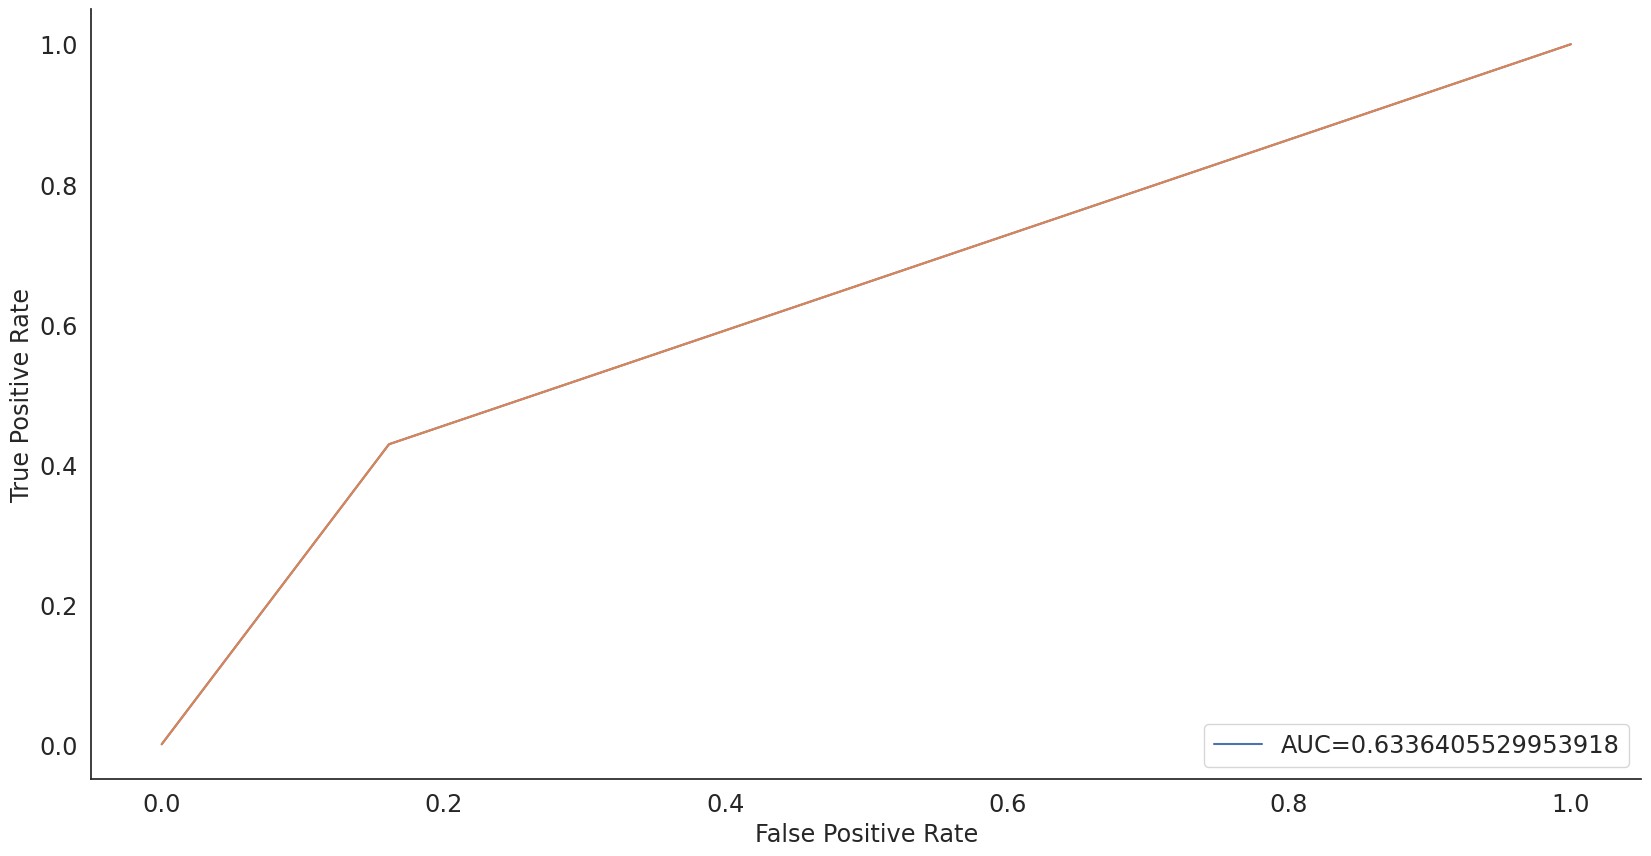

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(treino_x, treino_y)
y_pred_dt = clf.predict(teste_x)

matriz_confusao2 = confusion_matrix(teste_y, y_pred_reg_log)

VP2 = matriz_confusao2[1][1]
FP2 = matriz_confusao2[0][1]
VN2 = matriz_confusao2[0][0]
FN2 = matriz_confusao2[1][0]


sensibilidade2 = VP2/(VP2+FN2)
especificidade2 = VN2/(FP2+VN2)
precisao2 = VP2/(VP2+FP2)
f_score2 = 2*(precisao2*sensibilidade2)/(precisao2+sensibilidade2)

print()
print(f"Acurácia: {accuracy_score(teste_y, y_pred_dt)*100:.2f}")
print("precisao", precisao2)
print("sensibilidade", sensibilidade2)
print("especificidade", especificidade2)
print("f_score", f_score2)
print()

fpr2, tpr2, _ = metrics.roc_curve(teste_y,  y_pred_dt)
auc2 = metrics.roc_auc_score(teste_y, y_pred_dt)

#ROC curve
plt.plot(fpr2,tpr2,label="AUC="+str(auc2))
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## 7 Conclusão

 A partir dos resultados obtidos, é possível perceber que conseguimos uma acurácia de aproximadamente 70% em 3 modelos diferentes. A acurácia seria maior se tivéssemos mais dados ou se não tivéssemos dropados a coluna 'tempo'. Porém, mesmo com a acurácia teoricamente maior, o modelo não representaria situações reais, pois, nesse caso, a morte implicaria no tempo, e não o contrário. <br/>

 Outro ponto importante a se considerar é o fato de que os 3 modelos diferentes possuem a mesma acurácia, o que pode ser um indicativo de que temos poucos dados para se trabalhar, gerando resultados iguais. Caso tivéssemos acesso a mais dados, seria possível ter resultados mais certeiros e menos erros.